# TP 6

## Ej 1: caso $\frac{E_c}{E_j}=10$

In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import time, itertools
import os
import tqdm
from ipywidgets import interact, widgets

In [2]:
dim=20
b=destroy(dim)
num=b.dag()*b
def psi(n):
    return basis(dim,n)
pi=np.pi

In [3]:
def Hk(Ec,ng):
    return 4*Ec*((num-ng)**2)
def H_joseph_n(Ej,n):
    return Ej/2*(psi(n)*psi(n+1).dag() + psi(n+1)*psi(n).dag()) 
def H_suma(Ej,dim):
    hal=0
    for n in range(dim-1):
        hal += H_joseph_n(Ej,n)
    return hal
    

def H_cpb(Ec,ng,H_sumado):
    return Hk(Ec,ng)+H_sumado
        

In [4]:

ng_Start=0
ng_End=20
ng_steps=200

ng_arr=np.linspace(ng_Start,ng_End,ng_steps)

def graf(Ec,Ej,yshift):
    energies_cpb=[]       
    energies_0=[]
    
    H_sumado=H_suma(Ej,dim)
    
    for ng in tqdm.tqdm(ng_arr):
        Hcpb=H_cpb(Ec,ng,H_sumado)
        ener_cpb,eigen_cpb=Hcpb.eigenstates()
        energies_cpb.append(ener_cpb)
        H_0=Hk(Ec,ng)
        ener_0,eigen_0=H_0.eigenstates()
        energies_0.append(ener_0)
    
    energies_cpb_arr=np.array(energies_cpb)
    energies_0_arr=np.array(energies_0)
    
    plt.plot(ng_arr,energies_cpb_arr,'b',label='H_cpb')
    plt.plot(ng_arr,energies_0_arr,'r--',label='H0')
    plt.xlabel('ng')
    plt.ylim(-yshift,50)
    # plt.xlim(0)
    plt.ylabel('E')
    plt.show();

interact(graf,
         Ec=widgets.FloatSlider(min=0., max=100, step=1,value=1),
        Ej=widgets.FloatSlider(min=0., max=100, step=1,value=10),
        yshift=widgets.FloatSlider(min=0,max=100,step=1,value=0));

interactive(children=(FloatSlider(value=1.0, description='Ec', step=1.0), FloatSlider(value=10.0, description=…

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 43.43it/s]


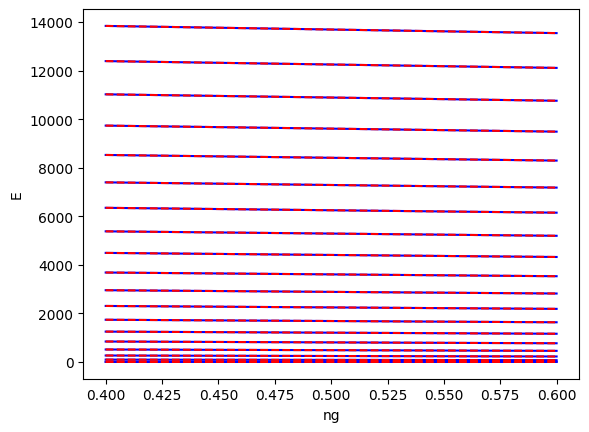

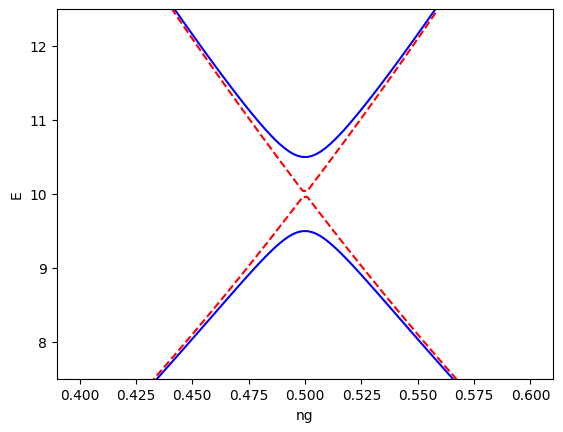

In [5]:
Ec=10
Ej=1

ng_Start=0.4
ng_End=0.6
ng_steps=100

ng_arr=np.linspace(ng_Start,ng_End,ng_steps)

energies_cpb=[]       
energies_0=[]

H_sumado=H_suma(Ej,dim)

for ng in tqdm.tqdm(ng_arr):
    Hcpb=H_cpb(Ec,ng,H_sumado)
    ener_cpb,eigen_cpb=Hcpb.eigenstates()
    energies_cpb.append(ener_cpb)
    H_0=Hk(Ec,ng)
    ener_0,eigen_0=H_0.eigenstates()
    energies_0.append(ener_0)

energies_cpb_arr=np.array(energies_cpb)
energies_0_arr=np.array(energies_0)

plt.plot(ng_arr,energies_cpb_arr,'b',label='H_cpb')
plt.plot(ng_arr,energies_0_arr,'r--',label='H0')
plt.xlabel('ng')
plt.ylabel('E')
plt.show();


plt.figure()
plt.plot(ng_arr,energies_cpb_arr,'b',label='H_cpb')
plt.plot(ng_arr,energies_0_arr,'r--',label='H0')
plt.ylim(7.5,12.5)
plt.xlabel('ng')
plt.ylabel('E');



Aquí está graficado el espectro de energías con respecto a $n_g$, el offset de carga. Vemos que para $n_g\approx 0,5$ se abre un anticruce: en ese punto, los autoestados son superposición cuántica de $|n=0\rangle$ y $|n=1\rangle$.

Podemos ver cómo está distribuido el autoestado de menor energía en distintos valores de $n$:

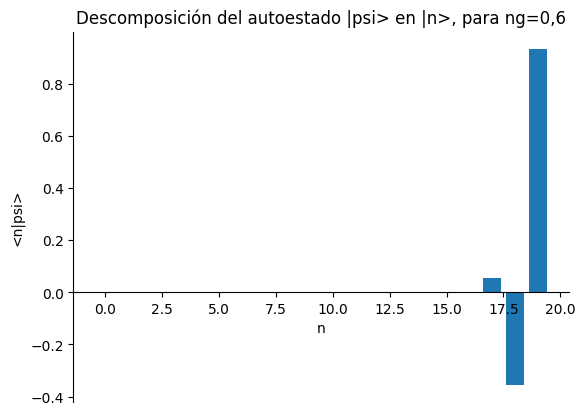

In [31]:
ng=10
Ec=1
Ej=10

H_sumado=H_suma(Ej,dim)

Hcpb=H_cpb(Ec,ng,H_sumado)
ener_cpb,eigen_cpb=Hcpb.eigenstates()

n_arr=np.linspace(0,dim-1,dim)
plt.figure()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_position(('data', 0))
plt.title('Descomposición del autoestado |psi> en |n>, para ng=0,6')
plt.ylabel('<n|psi>')
plt.xlabel('n')
plt.bar(n_arr,[np.real(psi(int(x)).overlap(eigen_cpb[0])) for x in n_arr],bottom=0);

Para $n_g=0,6$, el autoestado es casi igual al de el hamiltoniano con $E_j = 0$. Se está lejos del anticruce y los autoestados son de número de pares bien definidos.

Si nos paramos en el anticruce, $n_g=0,5$...

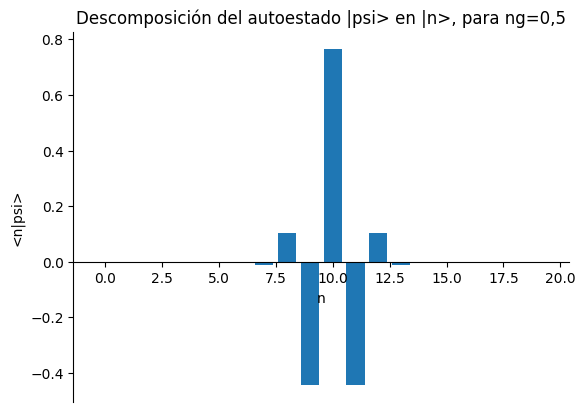

In [32]:
ng=10
Ec=1
Ej=10

H_sumado=H_suma(Ej,dim)

Hcpb=H_cpb(Ec,ng,H_sumado)
ener_cpb,eigen_cpb=Hcpb.eigenstates()

n_arr=np.linspace(0,dim-1,dim)
plt.figure()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_position(('data', 0))
plt.title('Descomposición del autoestado |psi> en |n>, para ng=0,5')
plt.ylabel('<n|psi>')
plt.xlabel('n')
plt.bar(n_arr,[np.real(psi(int(x)).overlap(eigen_cpb[0])) for x in n_arr],bottom=0);

En este caso, $|n=0\rangle$ y $|n=1\rangle$ tienen el mismo peso, el autoestado es de la forma $\frac{|0\rangle \pm |1\rangle}{\sqrt{2}}$.

Podemos ver cómo se descompone este autoestado en el espectro de autoestados de fase $\delta$ definida. 

Hacemos fourier para definir los $|\delta\rangle$

In [19]:
def delta(d):
    psi_delta=0
    for n in range(dim):
        psi_delta += np.exp(-1j*d*n*2*np.pi/dim)*psi(n)
    return (1/np.sqrt(dim))*psi_delta

Lejos del anticruce $\rightarrow$

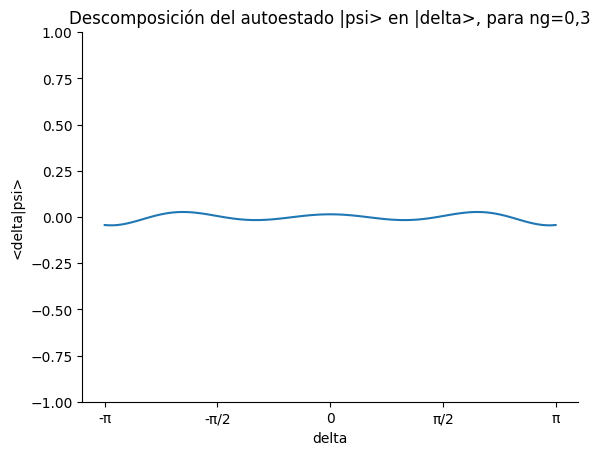

In [35]:
ng=10
Ec=1
Ej=10

H_sumado=H_suma(Ej,dim)

Hcpb=H_cpb(Ec,ng,H_sumado)
ener_cpb,eigen_cpb=Hcpb.eigenstates()

delta_arr=np.linspace(-np.pi,np.pi,100)
plt.figure()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['bottom'].set_position(('data', 0))
plt.ylim(-1,1)
plt.title('Descomposición del autoestado |psi> en |delta>, para ng=0,3')
plt.ylabel('<delta|psi>')
plt.xlabel('delta')
plt.xticks(np.arange(-pi, pi+pi/2, step=(pi/2)), ['-π','-π/2','0','π/2','π'])
plt.plot(delta_arr,[np.real(delta(x).overlap(eigen_cpb[0])) for x in delta_arr]);

Como para $n_g=0,3$, $n$ está bien definido, entonces $\delta$ está extremadamente mal definida, aparece como una constante.

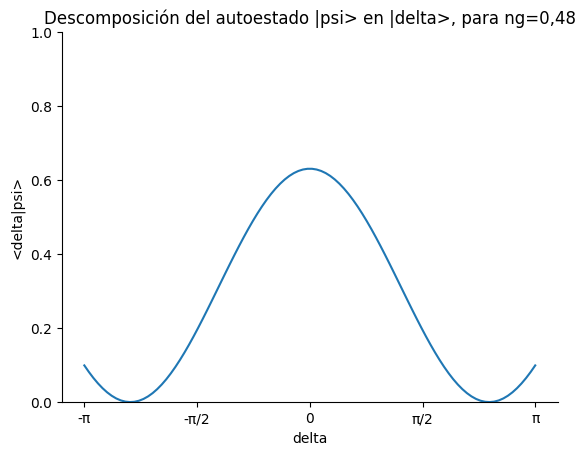

In [21]:
ng=0.5
Ec=10
Ej=1

H_sumado=H_suma(Ej,dim)

Hcpb=H_cpb(Ec,ng,H_sumado)
ener_cpb,eigen_cpb=Hcpb.eigenstates()

delta_arr=np.linspace(-np.pi,np.pi,100)
plt.figure()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['bottom'].set_position(('data', 0))
plt.ylim(0,1)
plt.title('Descomposición del autoestado |psi> en |delta>, para ng=0,48')
plt.ylabel('<delta|psi>')
plt.xlabel('delta')
plt.xticks(np.arange(-pi, pi+pi/2, step=(pi/2)), ['-π','-π/2','0','π/2','π'])
plt.plot(delta_arr,[np.real(delta(x).overlap(eigen_cpb[1])) for x in delta_arr]);

A medida que me acerco al anticruce, empieza a aparecer un comportamiento más oscilatorio. El estado de $\delta$ definido $|\delta=0\rangle\approx \frac{|0\rangle+|1\rangle}{\sqrt{2}}$ empieza a desaparecer a medida que nos acercamos al anticruce, mientras que predomina el estado $|\delta=\pi\rangle$. Esto nos dice que el autoestado de menor energía es $|\delta=\pi\rangle$.

## Ej 2: caso $\frac{E_c}{E_j}=0,1$

### Espectro de energías

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 41.14it/s]


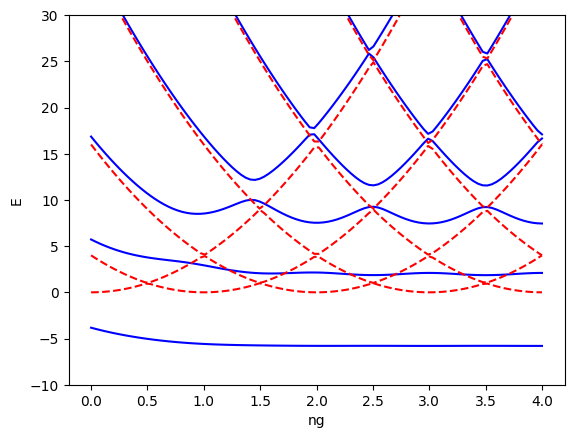

In [23]:
Ec=1
Ej=10

ng_Start=0
ng_End=4
ng_steps=100

ng_arr=np.linspace(ng_Start,ng_End,ng_steps)

energies_cpb=[]       
energies_0=[]

H_sumado=H_suma(Ej,dim)

for ng in tqdm.tqdm(ng_arr):
    Hcpb=H_cpb(Ec,ng,H_sumado)
    ener_cpb,eigen_cpb=Hcpb.eigenstates()
    energies_cpb.append(ener_cpb)
    H_0=Hk(Ec,ng)
    ener_0,eigen_0=H_0.eigenstates()
    energies_0.append(ener_0)

energies_cpb_arr=np.array(energies_cpb)
energies_0_arr=np.array(energies_0)



plt.figure()
plt.plot(ng_arr,energies_cpb_arr,'b',label='H_cpb')
plt.plot(ng_arr,energies_0_arr,'r--',label='H0')
plt.ylim(-10,30)
plt.xlabel('ng')
plt.ylabel('E')
plt.show();

Cuánto más grande es la energía de Josephson, las autoenergías se planchan con respecto a $n_g$: comienzan a tener un número de pares mal definidos, y por lo tanto una fase bien definida. 

Veamos cómo se descompone el primer autoestado en estados de $n$ y $\delta$ definidos, parándome en $n_g=2$, donde la curva es mayormente plana. Esta sería plana a lo largo de todo el eje $n_g$, si considerara más elementos del Hamiltoniano (en este caso sólo 5).

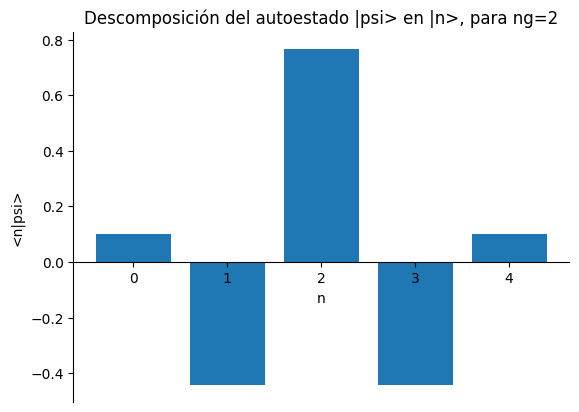

In [236]:
ng=2
Ec=1
Ej=10

H_sumado=H_suma(Ej,dim)

Hcpb=H_cpb(Ec,ng,H_sumado)
ener_cpb,eigen_cpb=Hcpb.eigenstates()

n_arr=np.linspace(0,dim-1,dim)
plt.figure()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_position(('data', 0))
plt.title('Descomposición del autoestado |psi> en |n>, para ng=2')
plt.ylabel('<n|psi>')
plt.xlabel('n')
plt.bar(n_arr,[np.real(psi(int(x)).overlap(eigen_cpb[0])) for x in n_arr],bottom=0);

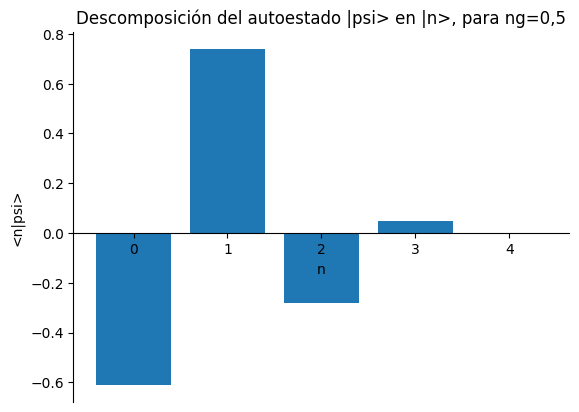

In [237]:
ng=0.5
Ec=1
Ej=10

H_sumado=H_suma(Ej,dim)

Hcpb=H_cpb(Ec,ng,H_sumado)
ener_cpb,eigen_cpb=Hcpb.eigenstates()

n_arr=np.linspace(0,dim-1,dim)
plt.figure()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_position(('data', 0))
plt.title('Descomposición del autoestado |psi> en |n>, para ng=0,5')
plt.ylabel('<n|psi>')
plt.xlabel('n')
plt.bar(n_arr,[np.real(psi(int(x)).overlap(eigen_cpb[0])) for x in n_arr],bottom=0);

Vemos que la carga se encuentra muy deslocalizada, mientras que la fase...

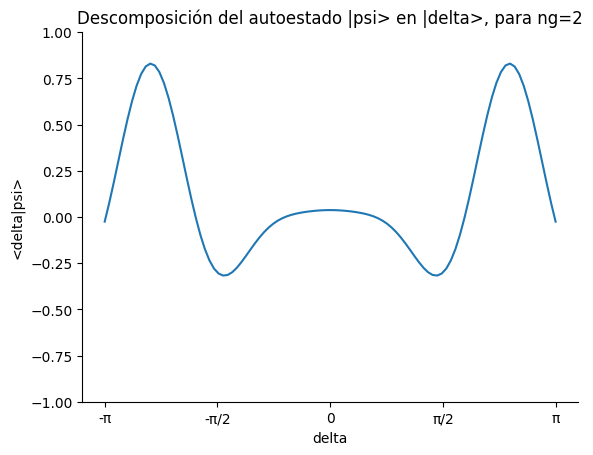

In [249]:
ng=2
Ec=1
Ej=10

H_sumado=H_suma(Ej,dim)

Hcpb=H_cpb(Ec,ng,H_sumado)
ener_cpb,eigen_cpb=Hcpb.eigenstates()

delta_arr=np.linspace(-np.pi,np.pi,100)
plt.figure()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['bottom'].set_position(('data', 0))
plt.ylim(-1,1)
plt.title('Descomposición del autoestado |psi> en |delta>, para ng=2')
plt.ylabel('<delta|psi>')
plt.xlabel('delta')
plt.xticks(np.arange(-pi, pi+pi/2, step=(pi/2)), ['-π','-π/2','0','π/2','π'])
plt.plot(delta_arr,[np.real(delta(x).overlap(eigen_cpb[0])) for x in delta_arr]);

Aquí aparece el batman, donde delta se encuentra más localizado, pero no del todo localizado, aparecen dos picos a fases distintas, y unos picos extra de menor intensidad. No recuerdo bien por qué es este comportamiento, si después lo podemos charlar en clase, genial.